## Network maps

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
N = 10
G = nx.scale_free_graph(N)
while not nx.is_strongly_connected(G):
    e1 = np.random.randint(N)
    e2 = np.random.randint(N)
    G.add_edge(e1, e2)

In [3]:
for (u, v, w) in G.edges(data=True):
    w['weight'] = np.random.rand(1)[0]

In [4]:
G1 = nx.stochastic_graph(G)

In [5]:
A = nx.adjacency_matrix(G1)
D = np.diag(np.asarray(np.sum(A, axis=1)).reshape(-1))

### Saddle-node

In [6]:
p = 0.3
n_iter = 500
x_sn = np.zeros((n_iter, N))
fn_sn = lambda x: x + p - np.square(x)

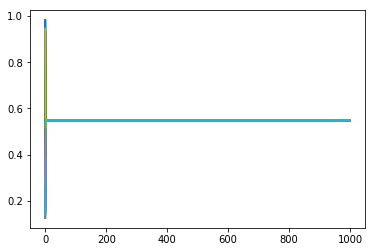

In [25]:
x_sn = np.zeros((n_iter, N))
x_sn[0] = np.random.rand(N)
for iter in np.arange(0,n_iter-1):
    x_sn[iter+1] = A.dot(fn_sn(x_sn[iter]))

for i in np.arange(N):
    plt.plot(x_sn[:,])
plt.show()

### Logistic map

In [20]:
n_iter = 1000
n_select = 100
#r = np.linspace(2.5, 4, n_iter)
r = 3
logistic_map = lambda x: 3*x*(1-x)

In [21]:
x_log = np.zeros((n_iter, N))
x_log[0] = np.random.rand(N)

In [22]:
for iter in np.arange(0,n_iter-1):
    x_log[iter+1] = A.dot(logistic_map( x_log[iter]))

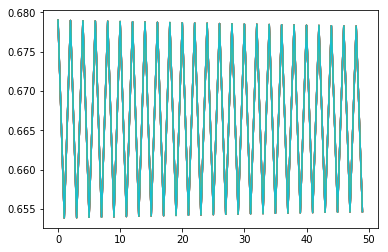

In [23]:
for i in np.arange(N):
    plt.plot(x_log[100:150,i])
plt.show()

### Tent map

In [12]:
tent_map = lambda x: 1.2*np.minimum(x,1-x)

In [13]:
x_tent = np.zeros((n_iter, N))
x_tent[0] = x_log[0]
for iter in np.arange(0,n_iter-1):
    x_tent[iter+1] = A.dot(tent_map(x_tent[iter]))

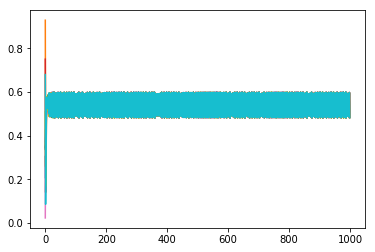

In [14]:
for i in np.arange(N):
    plt.plot(x_tent[:,i])
plt.show()